# <span style="color:gray">Salary Prediction using Linear Regression & Gradient Boosting Regressor</span>

 ## <span style="color:black">1. Define</span>   
 Problem -  
 >Predict Salary  
 
 What we have - 
 >100k observations.  
 >7 features - companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis  
 >1 target - salary  
 >4 Categorical/Qualitative - companyId, jobType, degree, major, industry  
 >2 Numeric/Quantitative - yearsExperience, milesFromMetropolis  
 
 Type of Algorithm -  
 >Linear Regression

 ## <span style="color:black">2. Discover</span> 

### <span style="color:black">2.1. Import Libraries</span> 

In [68]:
%%capture
! pip install seaborn
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### <span style="color:black">2.2. Import data</span>

In [3]:
train_features_df = pd.read_csv("data/train_features.csv")
train_target_df = pd.read_csv("data/train_salaries.csv")
test_features_df = pd.read_csv("data/test_features.csv")

### <span style="color:black">2.3. Clean data</span>

In [4]:
train_features_df.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [5]:
train_target_df.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [6]:
test_features_df.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [7]:
#join the train set with target on jobId as it looks like its a common set
train_merge = pd.merge(train_features_df, train_target_df, on='jobId')

In [8]:
train_merge.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163

In [9]:
# check datatypes
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [10]:
#check for nulls 
train_merge.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [11]:
train_merge.describe(include = 'all')

jobId companyId  jobType       degree    major industry  \
count            1000000   1000000  1000000      1000000  1000000  1000000   
unique           1000000        63        8            5        9        7   
top     JOB1362685369218    COMP39   SENIOR  HIGH_SCHOOL     NONE      WEB   
freq                   1     16193   125886       236976   532355   143206   
mean                 NaN       NaN      NaN          NaN      NaN      NaN   
std                  NaN       NaN      NaN          NaN      NaN      NaN   
min                  NaN       NaN      NaN          NaN      NaN      NaN   
25%                  NaN       NaN      NaN          NaN      NaN      NaN   
50%                  NaN       NaN      NaN          NaN      NaN      NaN   
75%                  NaN       NaN      NaN          NaN      NaN      NaN   
max                  NaN       NaN      NaN          NaN      NaN      NaN   

        yearsExperience  milesFromMetropolis          salary  
count    1000000.000000       1000000.000000  1000000.000000  
unique              NaN                  NaN             NaN  
top                 NaN                  NaN             NaN  
freq                NaN                  NaN             NaN  
mean          11.992386            49.529260      116.061818  
std            7.212391            28.877733       38.717936  
min            0.000000             0.000000        0.000000  
25%            6.000000            25.000000       88.000000  
50%           12.000000            50.000000      114.000000  
75%           18.000000            75.000000      141.000000  
max           24.000000            99.000000      301.000000

In [12]:
#dropping records with Salaries == 0
train_merge = train_merge[train_merge.salary != 0]

#### <span style="color:black">2.1. Import Libraries</span><Font color = black>  2.3.1 Observations</font>  
> dont see any nulls.  
> there are some observations that have 0 salaries, which seems an error, so dropped.  
> overall data looks clean.

### <span style="color:black">2.1. Import Libraries</span> <font color=black>2.4. Explore Data<font>

In [13]:
train_merge.describe(include = 'all')

jobId companyId jobType       degree   major industry  \
count             999995    999995  999995       999995  999995   999995   
unique            999995        63       8            5       9        7   
top     JOB1362685369218    COMP39  SENIOR  HIGH_SCHOOL    NONE      WEB   
freq                   1     16193  125886       236975  532353   143205   
mean                 NaN       NaN     NaN          NaN     NaN      NaN   
std                  NaN       NaN     NaN          NaN     NaN      NaN   
min                  NaN       NaN     NaN          NaN     NaN      NaN   
25%                  NaN       NaN     NaN          NaN     NaN      NaN   
50%                  NaN       NaN     NaN          NaN     NaN      NaN   
75%                  NaN       NaN     NaN          NaN     NaN      NaN   
max                  NaN       NaN     NaN          NaN     NaN      NaN   

        yearsExperience  milesFromMetropolis         salary  
count     999995.000000        999995.000000  999995.000000  
unique              NaN                  NaN            NaN  
top                 NaN                  NaN            NaN  
freq                NaN                  NaN            NaN  
mean          11.992407            49.529381     116.062398  
std            7.212390            28.877721      38.717163  
min            0.000000             0.000000      17.000000  
25%            6.000000            25.000000      88.000000  
50%           12.000000            50.000000     114.000000  
75%           18.000000            75.000000     141.000000  
max           24.000000            99.000000     301.000000

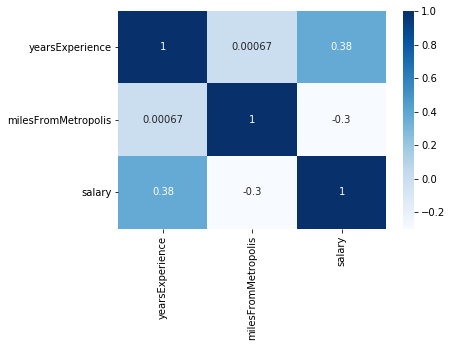

In [14]:
#Numerical features correlation related to Salary
train_merge_corr_indx = train_merge.corr().index
plt.figure(figsize=(6,4))
#plot heat map
g=sns.heatmap(train_merge[train_merge_corr_indx].corr(),annot=True,cmap="Blues")

In [15]:
def cat_boxplot(df, target, feature):
    df_feature_mean = df.groupby([feature],as_index=False).mean()
    df_feature_sorted = df_feature_mean.sort_values(by=target)
    plt.figure()
    sns.boxplot(x=feature, y=target, data=df, order=df_feature_sorted[feature].values)
    plt.xticks(rotation=45)

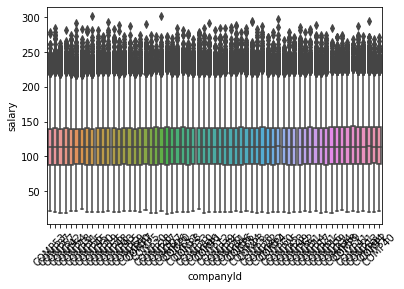

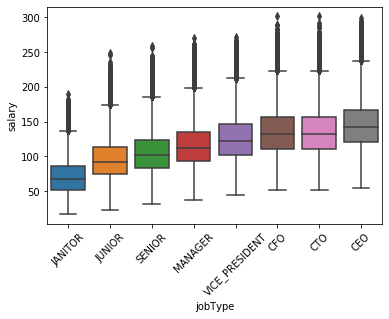

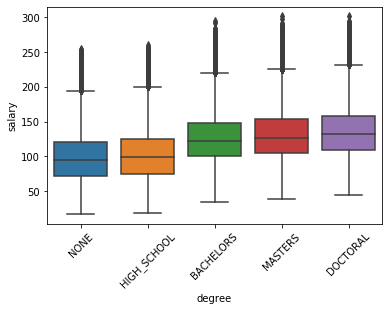

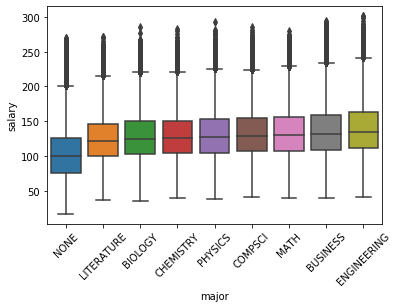

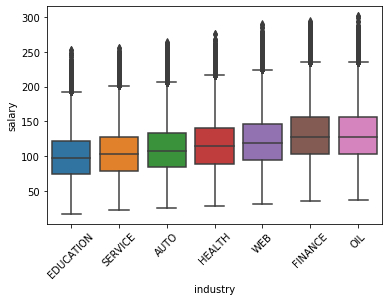

In [28]:
cat_features = ['companyId', 'jobType', 'degree', 'major', 'industry']
target = 'salary'
for feature in cat_features:
    cat_boxplot(train_merge, target, feature)

In [29]:
cat_features.remove('companyId')
num_features = ['yearsExperience','milesFromMetropolis']
train_merge_Hot_Enc = train_merge[num_features].join(pd.get_dummies(train_merge[cat_features]))
train_merge_Hot_Enc.head()

yearsExperience  milesFromMetropolis  jobType_CEO  jobType_CFO  \
0               10                   83            0            1   
1                3                   73            1            0   
2               10                   38            0            0   
3                8                   17            0            0   
4                8                   16            0            0   

   jobType_CTO  jobType_JANITOR  jobType_JUNIOR  jobType_MANAGER  \
0            0                0               0                0   
1            0                0               0                0   
2            0                0               0                0   
3            0                0               0                1   
4            0                0               0                0   

   jobType_SENIOR  jobType_VICE_PRESIDENT  ...  major_MATH  major_NONE  \
0               0                       0  ...           1           0   
1               0                       0  ...           0           1   
2               0                       1  ...           0           0   
3               0                       0  ...           0           0   
4               0                       1  ...           0           0   

   major_PHYSICS  industry_AUTO  industry_EDUCATION  industry_FINANCE  \
0              0              0                   0                 0   
1              0              0                   0                 0   
2              1              0                   0                 0   
3              0              1                   0                 0   
4              1              0                   0                 1   

   industry_HEALTH  industry_OIL  industry_SERVICE  industry_WEB  
0                1             0                 0             0  
1                0             0                 0             1  
2                1             0                 0             0  
3                0             0                 0             0  
4                0             0                 0             0  

[5 rows x 31 columns]

#### <span style="color:black">2.4.1 Observations</span>  
> Years of Experience has a positve corellation, miles from metropolis has negative correlation, and cant be ignored.  
> Company Id looks flat correlation, so can be ignored.  
> All other features have some correlation.

 ## <span style="color:black">3. Develop</span>

### <span style="color:black">3.1. Fit Model</span>

In [50]:
#split the new df to training and test
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_merge_Hot_Enc, train_merge['salary'], test_size=0.25, random_state=42)

In [36]:
from sklearn.model_selection import cross_val_score

def cv(model, features, target,fold): 
    Rcross = cross_val_score(model,features,target, cv=fold, scoring='neg_mean_squared_error')
    print(model)
    print('Mean: '+str(- Rcross.mean())+', Std: '+str(Rcross.std()))

### <span style="color:black">3.2. Linear Regression</span>

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
#fit the model
#lr.fit(train_merge_Hot_Enc,train_merge['salary'])
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#evaluate the model
#cv(lr,train_merge_Hot_Enc,train_merge['salary'],2)
cv(lr,train_x,train_y,2)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean: 384.4316229758657, Std: 1.4003289907950887


In [54]:
#calculate the prediction
test_x_predict = lr.predict(test_x)

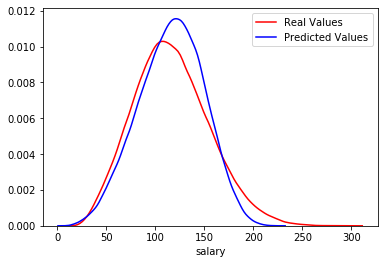

In [55]:
#plot the real vs predicted
ax1 = sns.distplot(test_y, hist=False, color="r", label="Real Values")
sns.distplot(test_x_predict, hist=False, color="b", label="Predicted Values" , ax=ax1)

### <span style="color:black">3.3. Gradient Boosting Regressor</span>

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=150, max_depth=5)

In [59]:
#fit the model
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
#evaluate the model
cv(gbr,train_x,train_y,2)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Mean: 357.1479505570103, Std: 0.8928411809063164


In [60]:
#calculate the prediction
test_x_gbrpredict = gbr.predict(test_x)

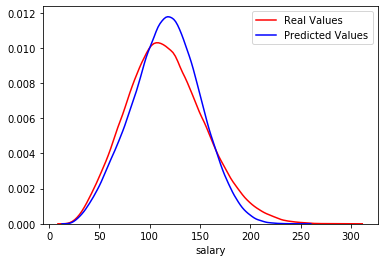

In [61]:
#plot the real vs predicted
ax1 = sns.distplot(test_y, hist=False, color="r", label="Real Values")
sns.distplot(test_x_gbrpredict, hist=False, color="b", label="Predicted Values" , ax=ax1)

#### <span style="color:black">3.1.1 Observations</span>  
> Although, Predicted Vs Real plots for both models almost looks same but based on MSE, Gradient Boosting Regressor did better than Linear Regression.  
> Although GBR can be tuneed further by increasing Number of Estimators parameter (n_estimators) and Maximum Depth parameter (max_depth) but that would at expense of performance.   
    > (Number of Estimators: It is denoted as n_estimators. The default value of this parameter is 100.Number of estimators is basically the number of boosting stages to be performed by the model. In other words number of estimators denotes the number of trees in the forest. More number of trees helps in learning the data better. On the other hand, more number of trees can result in higher training time. Hence we need to find the right and balanced value of n_estimators for optimal performance.)  
    > (Maximum Depth: It is denoted as max_depth. The default value of max_depth is 3 and it is an optional parameter. The maximum depth is the depth of the decision tree estimator in the gradient boosting regressor. We need to find the optimum value of this hyperparameter for best performance. As an example the best value of this parameter may depend on the input variables.)

### <span style="color:black">3.3.1 feature importance</span>

Text(0.5, 0, 'Feature importance')

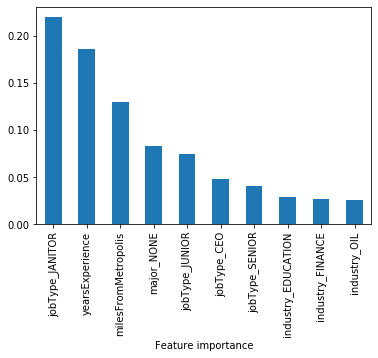

In [73]:
#visualization of feature importance using GBR
fi = pd.Series(gbr.feature_importances_, index=train_merge_Hot_Enc.columns).nlargest(10).plot(kind='bar')
plt.xlabel('Feature importance')

##### <span style="color:black">3.3.1.1 Observations</span> 
> Plot shows Job type and Years of Experience as the important features effecting the model

 ## <span style="color:black">4. Deploy</span>

### <span style="color:black">4.1. transform the features data for prediction</span>

In [83]:
#massage the test data
test_features_df.drop(['companyId', 'jobId'],axis = 1)
test_features_df_Hot_Enc = test_features_df[num_features].join(pd.get_dummies(test_features_df[cat_features]))
test_features_df_Hot_Enc.head()

yearsExperience  milesFromMetropolis  jobType_CEO  jobType_CFO  \
0               22                   73            0            0   
1               20                   47            0            0   
2               17                    9            0            0   
3               14                   96            0            0   
4               10                   44            0            0   

   jobType_CTO  jobType_JANITOR  jobType_JUNIOR  jobType_MANAGER  \
0            0                0               0                1   
1            0                0               1                0   
2            1                0               0                0   
3            0                0               0                1   
4            0                0               1                0   

   jobType_SENIOR  jobType_VICE_PRESIDENT  ...  major_MATH  major_NONE  \
0               0                       0  ...           0           1   
1               0                       0  ...           0           1   
2               0                       0  ...           0           0   
3               0                       0  ...           0           1   
4               0                       0  ...           0           0   

   major_PHYSICS  industry_AUTO  industry_EDUCATION  industry_FINANCE  \
0              0              0                   0                 0   
1              0              1                   0                 0   
2              0              0                   0                 0   
3              0              0                   0                 0   
4              0              0                   0                 0   

   industry_HEALTH  industry_OIL  industry_SERVICE  industry_WEB  
0                1             0                 0             0  
1                0             0                 0             0  
2                1             0                 0             0  
3                0             1                 0             0  
4                0             1                 0             0  

[5 rows x 31 columns]

In [81]:
##calculate the prediction
test_features_df_Hot_Enc_gbrpredict = gbr.predict(test_features_df_Hot_Enc)
test_features_df_Hot_Enc_gbrpredict

array([112.25194555,  93.2195217 , 181.49761349, ...,  54.50038396,
       160.62274084, 113.72743758])

In [86]:
#convert the array to dataframe
test_features_df_Hot_Enc_gbrpredict_df = pd.DataFrame(data=test_features_df_Hot_Enc_gbrpredict,  columns=["Predicted_salary"])

### <span style="color:black">4.2. Final</span>

In [89]:
#merge predicted dataframe with features data frame.
test_features_target_df = test_features_df.join(test_features_df_Hot_Enc_gbrpredict_df)
test_features_target_df

jobId companyId         jobType       degree    major  \
0       JOB1362685407687    COMP33         MANAGER  HIGH_SCHOOL     NONE   
1       JOB1362685407688    COMP13          JUNIOR         NONE     NONE   
2       JOB1362685407689    COMP10             CTO      MASTERS  BIOLOGY   
3       JOB1362685407690    COMP21         MANAGER  HIGH_SCHOOL     NONE   
4       JOB1362685407691    COMP36          JUNIOR     DOCTORAL  BIOLOGY   
...                  ...       ...             ...          ...      ...   
999995  JOB1362686407682    COMP54  VICE_PRESIDENT    BACHELORS     MATH   
999996  JOB1362686407683     COMP5         MANAGER         NONE     NONE   
999997  JOB1362686407684    COMP61         JANITOR         NONE     NONE   
999998  JOB1362686407685    COMP19             CTO     DOCTORAL     MATH   
999999  JOB1362686407686    COMP34          JUNIOR         NONE     NONE   

       industry  yearsExperience  milesFromMetropolis  Predicted_salary  
0        HEALTH               22                   73        112.251946  
1          AUTO               20                   47         93.219522  
2        HEALTH               17                    9        181.497613  
3           OIL               14                   96        104.041410  
4           OIL               10                   44        115.046296  
...         ...              ...                  ...               ...  
999995      OIL               14                    3        166.651740  
999996   HEALTH               20                   67        106.297231  
999997      OIL                1                   91         54.500384  
999998      OIL               14                   63        160.622741  
999999      OIL               16                   31        113.727438  

[1000000 rows x 9 columns]